In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display     import HTML


pd.options.display.max_columns = None


In [248]:
# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 18]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()



# cartegorical variables

def crammer_v(x,y):
    cm = pd.crosstab(x,y).to_numpy()
    # n = soma de linhas
    n = cm.sum()
    # r, k nr de linhas e colunas respectivamente
    r,k = cm.shape
    
    # correcao das equacoes para evitar bias
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 -(k-1)*(r-1)/(n-1))
    
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return  np.sqrt( (chi2corr/n) / (min(kcorr-1,rcorr-1))  )

Populating the interactive namespace from numpy and matplotlib


In [249]:
PATH = 'https://raw.githubusercontent.com/franciscofijamo/risc_credit/main/credito.csv'
df = pd.read_csv(PATH)

In [250]:
# rename columns with snakecase
labels = ['CheckingAcctStat',
          'Duration',
          'CreditHistory',
          'Purpose',
          'CreditAmount',
          'SavingsBonds',
          'Employment',
          'InstallmentRatePecnt',
          'SexAndStatus',
          'OtherDetorsGuarantors',
          'PresentResidenceTime',
          'Property',
          'Age',
          'OtherInstallments',
          'Housing',
          'ExistingCreditsAtBank',
          'Job',
          'NumberDependents',
          'Telephone',
          'ForeignWorker', 
          'CreditStatus']

df.columns = labels

In [251]:
numerics = df.select_dtypes(include = 'int64')
categoricals = df.select_dtypes(exclude = 'int64')

In [252]:
df.columns

Index(['CheckingAcctStat', 'Duration', 'CreditHistory', 'Purpose',
       'CreditAmount', 'SavingsBonds', 'Employment', 'InstallmentRatePecnt',
       'SexAndStatus', 'OtherDetorsGuarantors', 'PresentResidenceTime',
       'Property', 'Age', 'OtherInstallments', 'Housing',
       'ExistingCreditsAtBank', 'Job', 'NumberDependents', 'Telephone',
       'ForeignWorker', 'CreditStatus'],
      dtype='object')

In [253]:
numerics.describe()

,Duration,CreditAmount,InstallmentRatePecnt,PresentResidenceTime,Age,ExistingCreditsAtBank,NumberDependents,CreditStatus
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155,1.300300
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000




1.   Metade das pessoas levam menos de 1ano e 6 meses para pagarem seus cumpromissos.




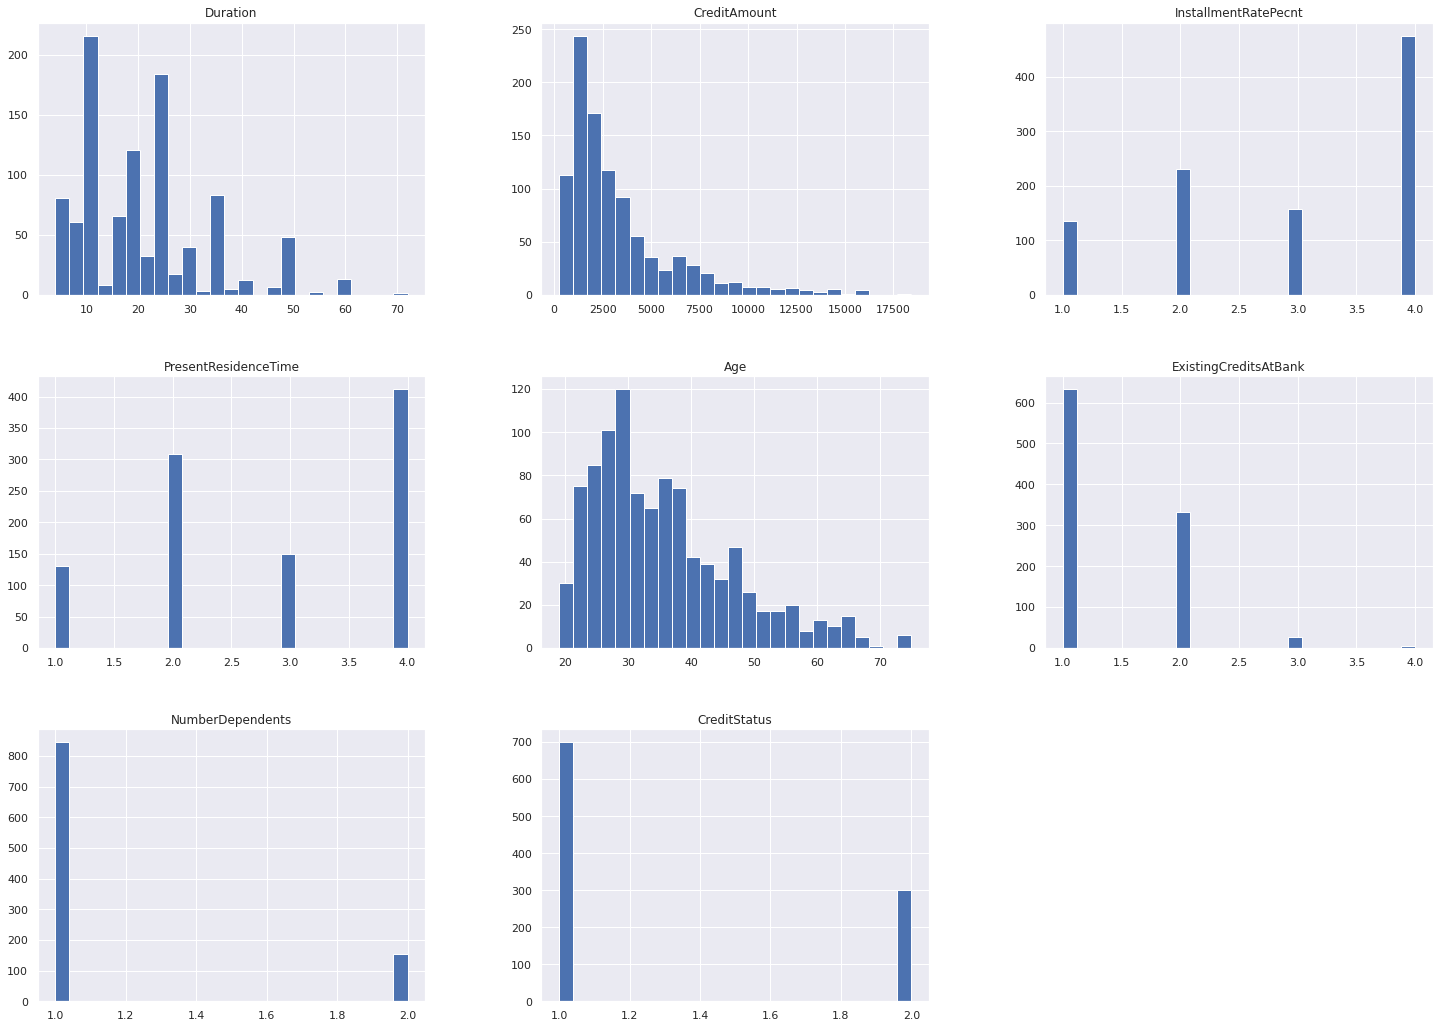

In [254]:
numerics.hist(bins = 25);

In [255]:
corr = df.corr(method  = 'pearson')
corr

,Duration,CreditAmount,InstallmentRatePecnt,PresentResidenceTime,Age,ExistingCreditsAtBank,NumberDependents,CreditStatus
Duration,1.000000,0.624714,0.075976,0.035410,-0.032863,-0.010025,-0.024385,0.214326
CreditAmount,0.624714,1.000000,-0.270820,0.029732,0.034924,0.021578,0.016829,0.154326
InstallmentRatePecnt,0.075976,-0.270820,1.000000,0.048387,0.055961,0.020744,-0.070850,0.073052
PresentResidenceTime,0.035410,0.029732,0.048387,1.000000,0.264680,0.088644,0.043120,0.003656
Age,-0.032863,0.034924,0.055961,0.264680,1.000000,0.147051,0.119858,-0.089678
ExistingCreditsAtBank,-0.010025,0.021578,0.020744,0.088644,0.147051,1.000000,0.110175,-0.045093
NumberDependents,-0.024385,0.016829,-0.070850,0.043120,0.119858,0.110175,1.000000,-0.003297
CreditStatus,0.214326,0.154326,0.073052,0.003656,-0.089678,-0.045093,-0.003297,1.000000


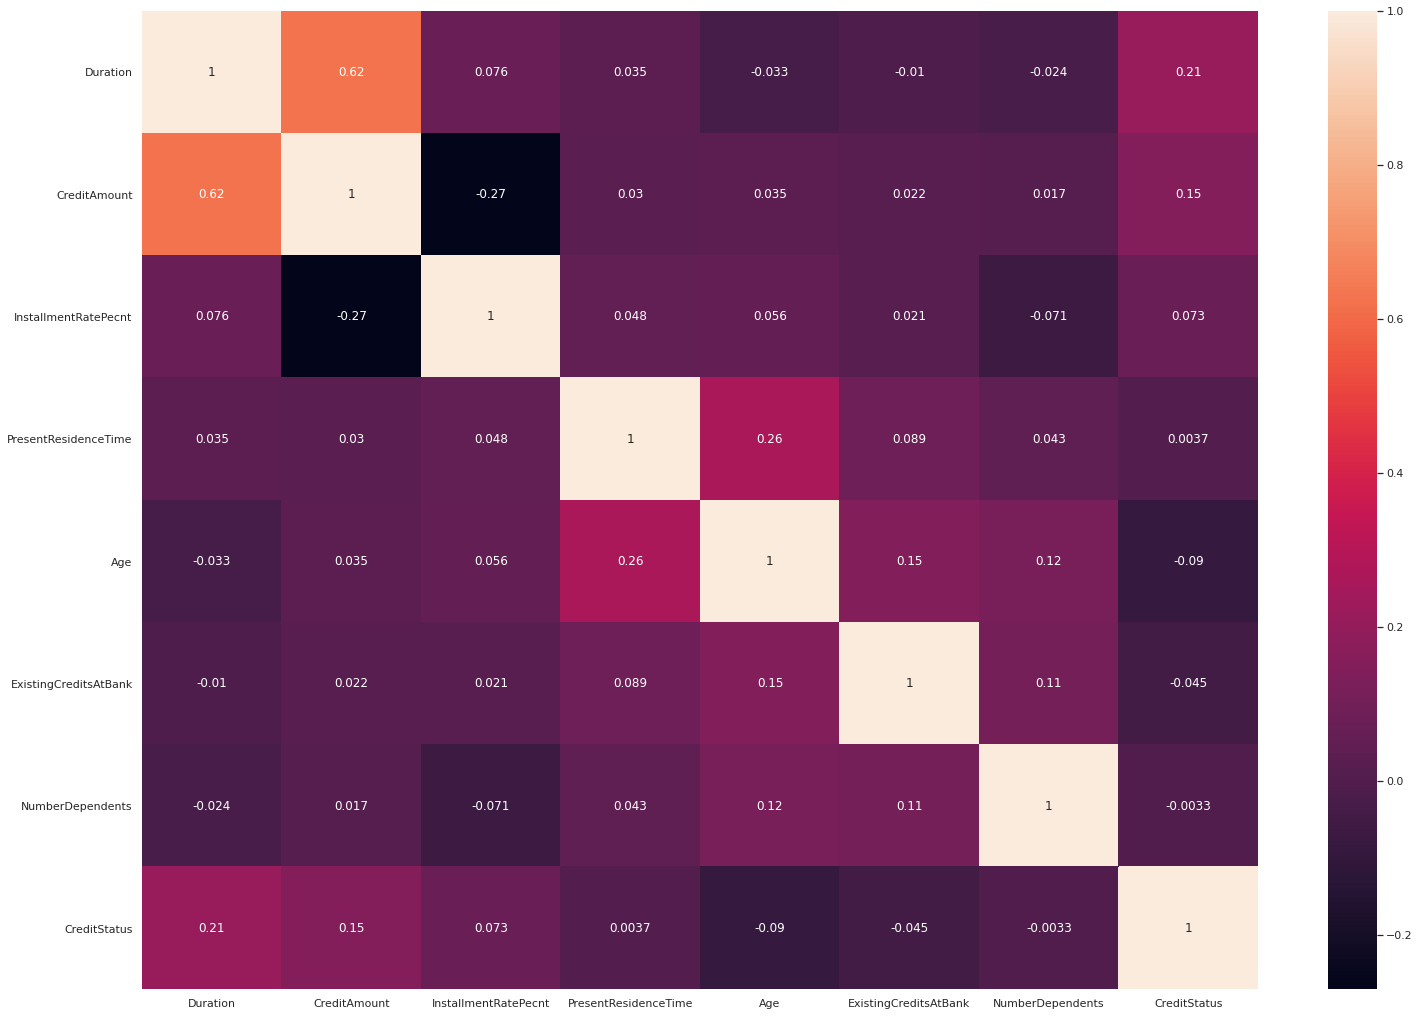

In [256]:
# Plot heatmap
sns.heatmap(corr, annot = True );

In [257]:
# Quanto cada atributo contribui para o CresditStatus
best_corr = corr['CreditStatus'].sort_values(ascending = False)
best_corr

CreditStatus             1.000000
Duration                 0.214326
CreditAmount             0.154326
InstallmentRatePecnt     0.073052
PresentResidenceTime     0.003656
NumberDependents        -0.003297
ExistingCreditsAtBank   -0.045093
Age                     -0.089678
Name: CreditStatus, dtype: float64

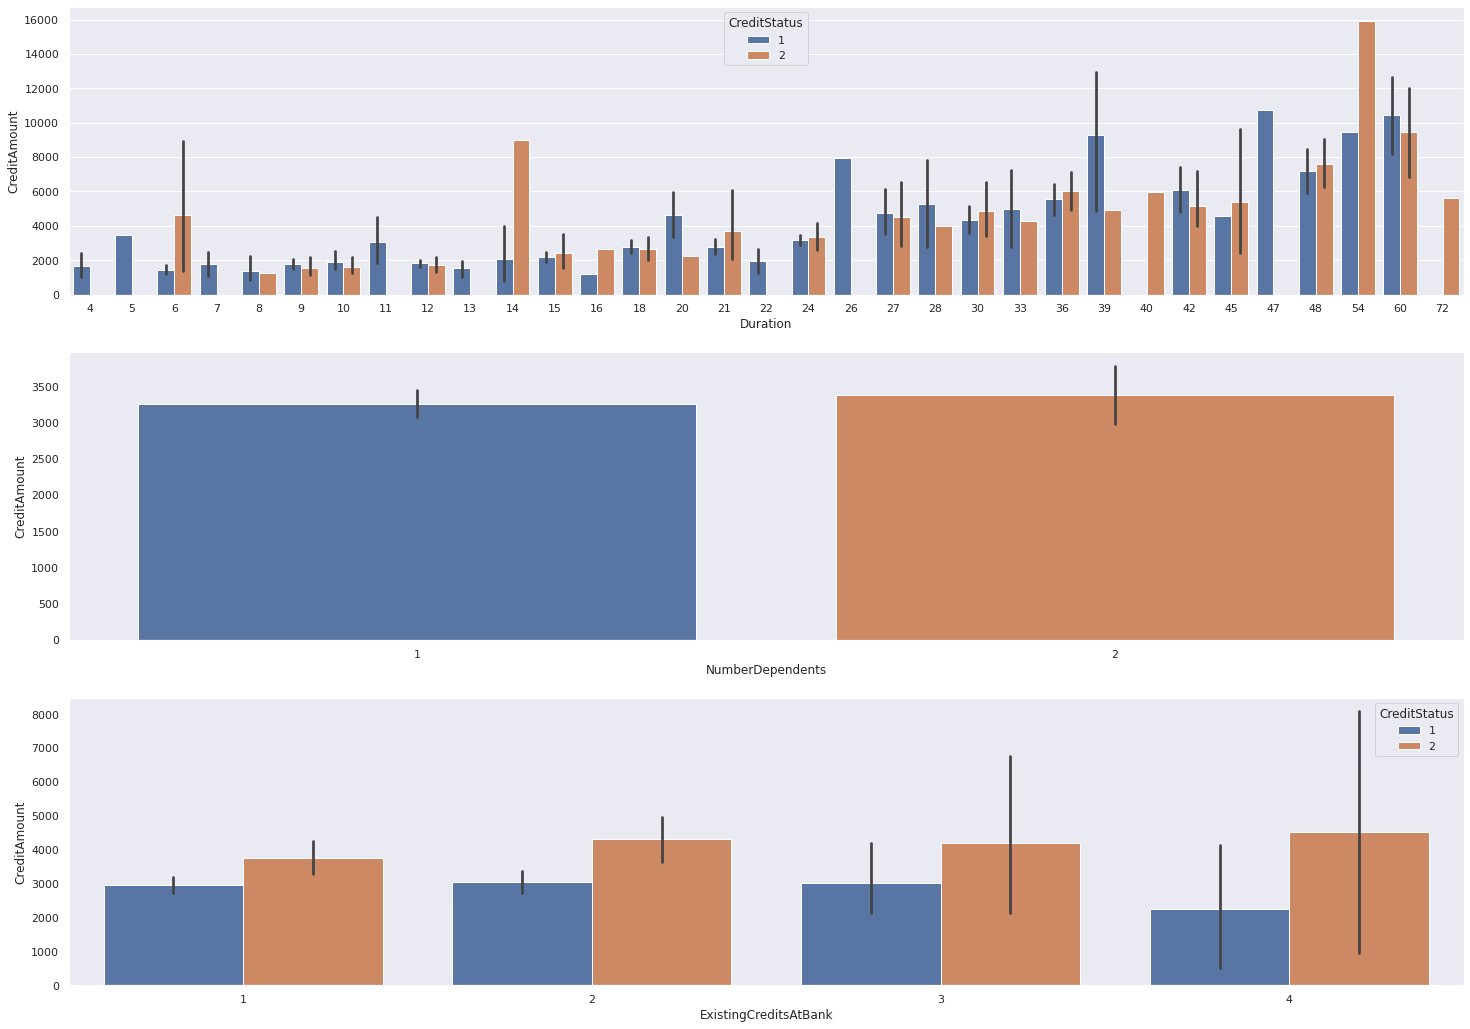

In [258]:

plt.subplot(3,1,1)
sns.set_style("dark")
sns.barplot( x= 'Duration', y = 'CreditAmount', hue = 'CreditStatus', data = df);

plt.subplot(3,1,2)
sns.barplot( x= 'NumberDependents', y = 'CreditAmount',  data = df);

plt.subplot(3,1,3)
sns.barplot( x= 'ExistingCreditsAtBank', y = 'CreditAmount', hue = 'CreditStatus', data = df);


In [259]:
df['SexAndStatus'].value_counts()

A93    547
A92    310
A94     92
A91     50
Name: SexAndStatus, dtype: int64

In [260]:
categoricals.head()

,CheckingAcctStat,CreditHistory,Purpose,SavingsBonds,Employment,SexAndStatus,OtherDetorsGuarantors,Property,OtherInstallments,Housing,Job,Telephone,ForeignWorker
0,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
1,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
2,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
3,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201
4,A14,A32,A46,A65,A73,A93,A101,A124,A143,A153,A172,A192,A201


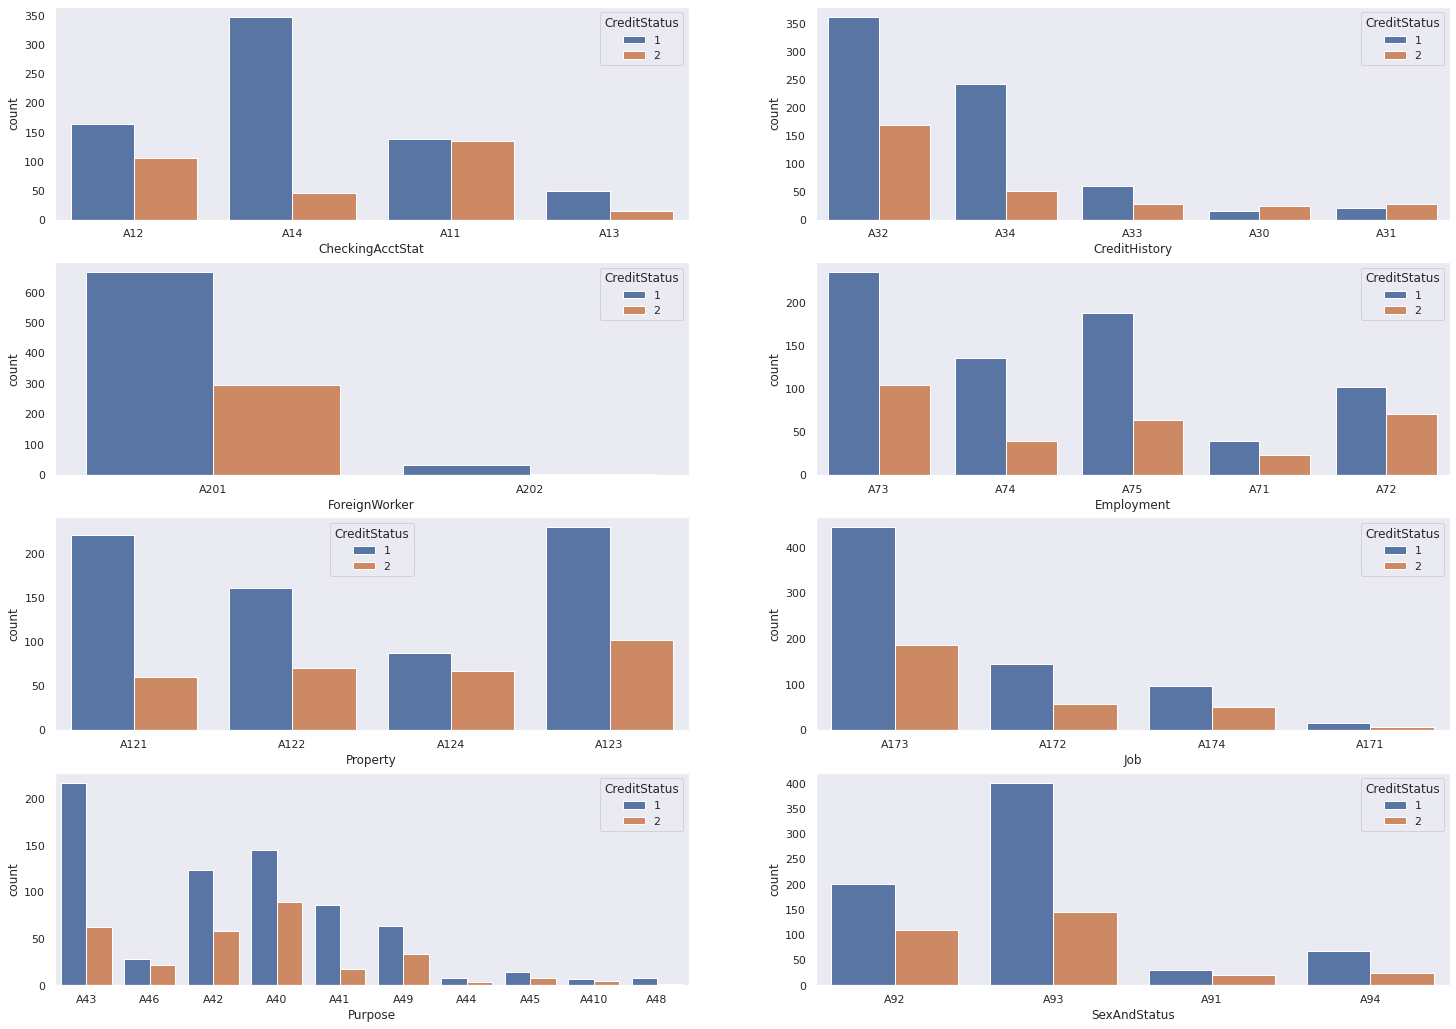

In [261]:
# Categorical vars
plt.subplot(4,2,1)
sns.countplot( x = 'CheckingAcctStat',  hue = 'CreditStatus', data = df);

plt.subplot(4,2,2)
sns.countplot(x = 'CreditHistory', hue = 'CreditStatus', data = df);


plt.subplot(4,2,3)
sns.countplot(x = 'ForeignWorker', hue = 'CreditStatus', data = df);

plt.subplot(4,2,4)
sns.countplot(x ='Employment', hue = 'CreditStatus', data = df);

plt.subplot(4,2,5)
sns.countplot(x = 'Property', hue = 'CreditStatus', data = df);

plt.subplot(4,2,6)
sns.countplot(x = 'Job', hue = 'CreditStatus', data = df);

plt.subplot(4,2,7)
sns.countplot(x = 'Purpose', hue = 'CreditStatus', data = df);

plt.subplot(4,2,8)
sns.countplot(x = 'SexAndStatus', hue = 'CreditStatus', data = df);



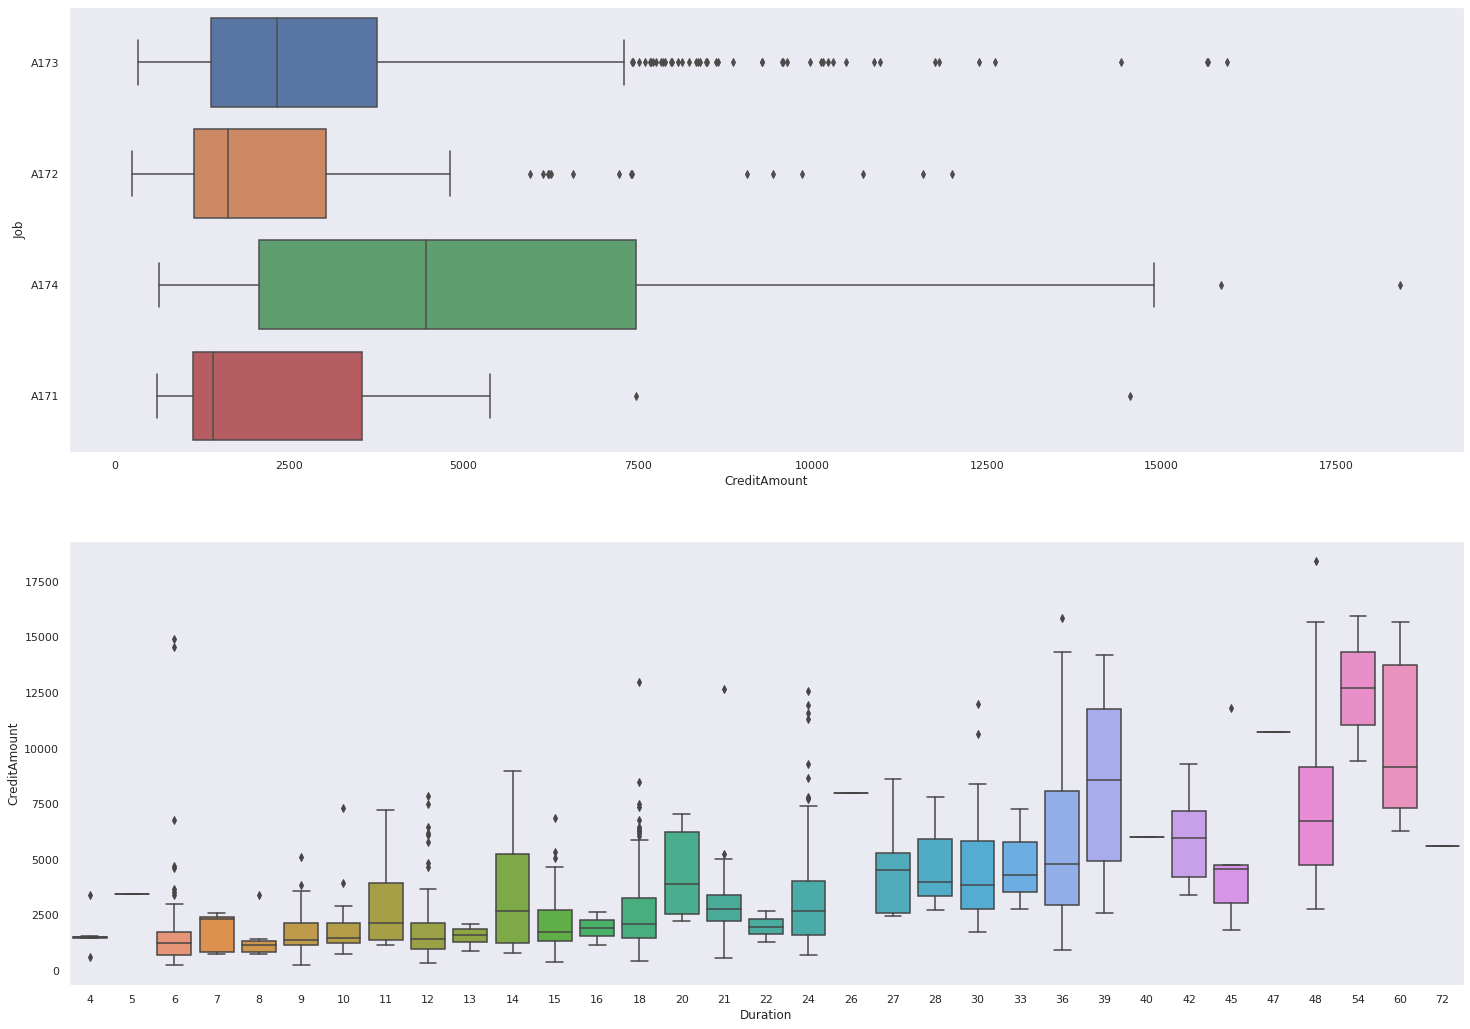

In [262]:
plt.subplot(2,1,1)

sns.boxplot(x = 'CreditAmount', y = 'Job', data = df);
plt.subplot(2,1,2)


sns.boxplot(x = 'Duration', y = 'CreditAmount', data = df);


In [263]:
df.CreditStatus.value_counts()

df['CreditStatus'].shape[0]*df['CreditStatus'].shape[0]/100

9980.01

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [265]:
categoricals.head()

,CheckingAcctStat,CreditHistory,Purpose,SavingsBonds,Employment,SexAndStatus,OtherDetorsGuarantors,Property,OtherInstallments,Housing,Job,Telephone,ForeignWorker
0,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
1,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
2,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
3,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201
4,A14,A32,A46,A65,A73,A93,A101,A124,A143,A153,A172,A192,A201


In [266]:
# Transforming Columns
df['ForeignWorker'] = df['ForeignWorker'].map({'A201':1,'A202':0 })
df['Employment'] = df['Employment'].map({'A71': 0, 'A72':1, 'A73':2, 'A74': 3, 'A75':4})
df['Job'] = df['Job'].map({'A171': 0, 'A172':1, 'A173':2, 'A174':3})

In [267]:
df1 = df.copy()

In [268]:
# Apply Onde Hot Encode in
# Next cliclical sted ad Purpose, etc
df1 = pd.get_dummies(df1, columns=['SexAndStatus',])

In [269]:
df1.head()

,CheckingAcctStat,Duration,CreditHistory,Purpose,CreditAmount,SavingsBonds,Employment,InstallmentRatePecnt,OtherDetorsGuarantors,PresentResidenceTime,Property,Age,OtherInstallments,Housing,ExistingCreditsAtBank,Job,NumberDependents,Telephone,ForeignWorker,CreditStatus,SexAndStatus_A91,SexAndStatus_A92,SexAndStatus_A93,SexAndStatus_A94
0,A12,48,A32,A43,5951,A61,2,2,A101,2,A121,22,A143,A152,1,2,1,A191,1,2,0,1,0,0
1,A14,12,A34,A46,2096,A61,3,2,A101,3,A121,49,A143,A152,1,1,2,A191,1,1,0,0,1,0
2,A11,42,A32,A42,7882,A61,3,2,A103,4,A122,45,A143,A153,1,2,2,A191,1,1,0,0,1,0
3,A11,24,A33,A40,4870,A61,2,3,A101,4,A124,53,A143,A153,2,2,2,A191,1,2,0,0,1,0
4,A14,36,A32,A46,9055,A65,2,2,A101,4,A124,35,A143,A153,1,1,2,A192,1,1,0,0,1,0


In [270]:
# Machine Learning

rf = RandomForestClassifier()

In [271]:
X = df1.drop('CreditStatus', axis = 1)
y = df1.CreditStatus

In [272]:
# Exluir variaveis categoricas
X = X.select_dtypes( exclude = 'object')

In [273]:
y.head()

0    2
1    1
2    1
3    2
4    1
Name: CreditStatus, dtype: int64

In [274]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, stratify = y) # stratify aleatoriedade

In [275]:
# train 
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [276]:
# predicoes

y_pred = rf.predict(X_test)

In [277]:
# acuracia

accuracy_score(y_test, y_pred)

0.732

In [278]:
# relatorio de classificacao

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.95      0.83       175
           2       0.65      0.23      0.34        75

    accuracy                           0.73       250
   macro avg       0.70      0.59      0.58       250
weighted avg       0.71      0.73      0.68       250



In [279]:
# Confusion Matrix

print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames= ['Predito'], margins=True))

Predito    1   2  All
Real                 
1        166   9  175
2         58  17   75
All      224  26  250


# Aplicando NearMiss (Undersample)

In [280]:
nr = NearMiss()

In [281]:
X, y = nr.fit_sample(X,y)
# fit_sample identifica onde aplicar o undersample  e aplica

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [282]:
#sns.countplot(x=y)

In [283]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, stratify = y) # stratify aleatoriedade

# instanciar random fores classifier
rf_2 = RandomForestClassifier()

# train 
rf_2.fit(X_train, y_train)

# predicao
y_pred = rf_2.predict(X_test)

# acuracia

accuracy_score(y_test, y_pred)

0.6733333333333333

In [284]:
# Relatorio de classificacao
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.68      0.68        75
           2       0.68      0.67      0.67        75

    accuracy                           0.67       150
   macro avg       0.67      0.67      0.67       150
weighted avg       0.67      0.67      0.67       150



In [285]:
# Confusion Matrix

print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames= ['Predito'], margins=True))

Predito   1   2  All
Real                
1        51  24   75
2        25  50   75
All      76  74  150


# Aplicando SMOTE (Over Sample)

In [286]:
df2 = df1.copy()

In [287]:
X = df2.drop('CreditStatus', axis = 1)
y = df2.CreditStatus

In [288]:
# Exluir variaveis categoricas
X = X.select_dtypes( exclude = 'object')

In [289]:
# ver distribuicao
#sns.countplot(x=y)

In [290]:
# sample_strategy = 0.5 > esse parametro usado, diz que deejamos aumentar 50% na classe minoritaria, ou seja podemos definir o limite
# por padrao ela aumenta para a quantidade exacta da classe majoritaria, e eiguala as amostras
smt = SMOTE()

In [291]:
X,y = smt.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [292]:
# Verificar se amostras estao igualados
np.bincount(y)

array([  0, 699, 699])

In [299]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, stratify = y) # stratify aleatoriedade

# instanciar random fores classifier
rf_3 = RandomForestClassifier(n_estimators=1000)

# train 
rf_3.fit(X_train, y_train)

# predicao
y_pred = rf_3.predict(X_test)

# acuracia

accuracy_score(y_test, y_pred)

0.76

In [300]:
# Relatorio de classificacao
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.78      0.76       175
           2       0.77      0.74      0.76       175

    accuracy                           0.76       350
   macro avg       0.76      0.76      0.76       350
weighted avg       0.76      0.76      0.76       350



In [301]:
 # Confusion Matrix

print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames= ['Predito'], margins=True))

Predito    1    2  All
Real                  
1        136   39  175
2         45  130  175
All      181  169  350
